In [2]:
'''
Data Visualisation: The goal of this hackathon is to analyze the nursing home data provided by the Center
for Medicare & Medicaid Services(CMS) and create visualizations to communicate the
resource constraints faced by the nursing homes
Data

Author: Murali Manohar
'''

'\nData Visualisation: The goal of this hackathon is to analyze the nursing home data provided by the Center\nfor Medicare & Medicaid Services(CMS) and create visualizations to communicate the\nresource constraints faced by the nursing homes\nData\n'

In [184]:
# import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [148]:
# read dataset 
data = pd.read_csv('COVID-19_Nursing_Home_Dataset.csv')



/Users/murali/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [343]:
'''
q1. Visualize the distribution of number of nursing home facilities by state and
county
'''

#Reshaping data for Using Stacked barplot

q1_state = data.groupby(['Provider State'], as_index=False)['Federal Provider Number'].nunique()
q1_state = q1_state.rename(columns = {'Federal Provider Number':'Unique Facilities'})

q1_county = data.groupby(['County'], as_index=False)['Federal Provider Number'].nunique()
q1_county = q1_county.rename(columns = {'Federal Provider Number':'Unique Facilities'})

q1 = data.groupby(['Provider State','County'], as_index=False)['Federal Provider Number'].nunique()

q1 = q1.rename(columns = {'Federal Provider Number':'Count'})

print(q1.head(100))
print('\n')
print(q1.describe())

print(q1_county)


   Provider State            County  Count
0              AK         Anchorage      3
1              AK            Bethel      1
2              AK  Cordova-Mccarthy      1
3              AK         Fairbanks      1
4              AK            Juneau      1
..            ...               ...    ...
95             AR            Conway      2
96             AR         Craighead      6
97             AR          Crawford      4
98             AR        Crittenden      3
99             AR             Cross      2

[100 rows x 3 columns]


             Count
count  2898.000000
mean      6.553830
std      16.510016
min       1.000000
25%       2.000000
50%       3.000000
75%       6.000000
max     552.000000
         County  Unique Facilities
0     Abbeville                  1
1        Acadia                  5
2      Accomack                  1
3           Ada                 16
4         Adair                  8
...         ...                ...
1701       York                 43
1702   

  Provider State  Unique Facilities
0             AK                 20
1             AL                229
2             AR                227
3             AZ                146
4             CA               1769
    # Facilities
AK            20
AL           229
AR           227
AZ           146
CA          1769


<AxesSubplot:>

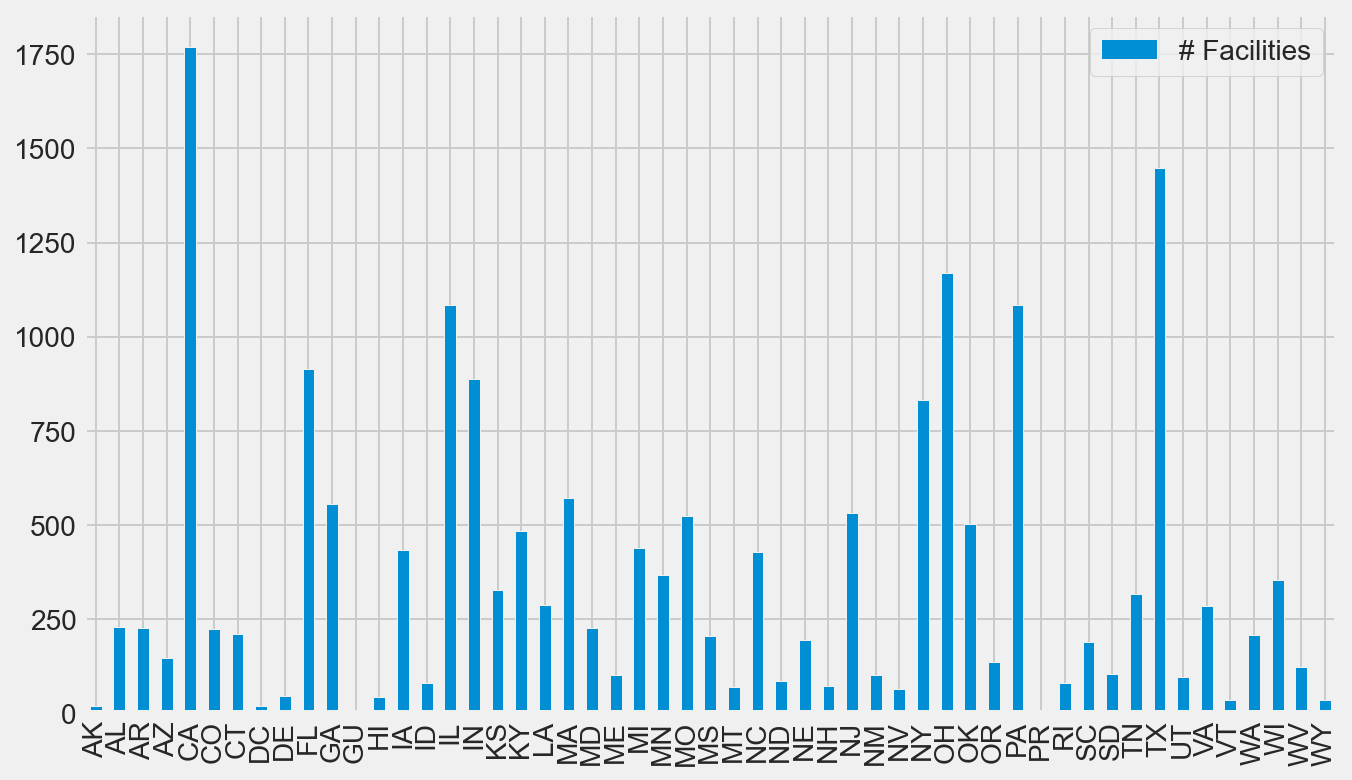

In [339]:
# q1 A) Bar Plot

q1_state = data.groupby(['Provider State'], as_index=False)['Federal Provider Number'].nunique()

q1_state = q1_state.rename(columns = {'Federal Provider Number':'Unique Facilities'})

q1_v = pd.DataFrame(list(q1_state['Unique Facilities']),columns = ['# Facilities'], index = list(q1_state['Provider State']))

print(q1_state.head())
print(q1_v.head())

q1_v.plot(kind='bar')


In [320]:
# exploring groupby()

data.groupby(['Provider State']).groups.keys()

data.groupby(['Provider State']).groups['AK']

print(len(data.groupby(['Provider State']).groups['AK']))

print(len(data.groupby(['Provider State','Provider Zip Code']).groups['AK',99929]))


#print(data.groupby(['Provider State'])['Provider Address'].nunique())

print(data.groupby(['Provider State'])['Federal Provider Number'].nunique()) # this is correct


859
43
Provider State
AK      20
AL     229
AR     224
AZ     146
CA    1188
CO     225
CT     211
DC      19
DE      47
FL     706
GA     360
GU       1
HI      44
IA     434
ID      82
IL     719
IN     534
KS     328
KY     285
LA     278
MA     375
MD     226
ME      93
MI     438
MN     366
MO     523
MS     202
MT      70
NC     429
ND      80
NE     196
NH      74
NJ     362
NM      71
NV      66
NY     617
OH     958
OK     298
OR     130
PA     689
PR       6
RI      80
SC     189
SD     104
TN     316
TX    1221
UT      97
VA     286
VT      35
WA     207
WI     350
WV     123
WY      37
Name: Provider Address, dtype: int64
Provider State
AK      20
AL     229
AR     227
AZ     146
CA    1769
CO     225
CT     212
DC      19
DE      47
FL     914
GA     555
GU       1
HI      44
IA     435
ID      82
IL    1085
IN     889
KS     328
KY     483
LA     289
MA     572
MD     228
ME     101
MI     438
MN     367
MO     523
MS     205
MT      70
NC     429
ND      87
NE     196
NH

In [340]:
# reshaping data for stacked bar plot

county_unique = data[['County']].drop_duplicates()
county_unique = list(county_unique['County'])

states_unique = q1[['Provider State']].drop_duplicates()
states_unique = list(states_unique['Provider State'])

#states_2898 = q1[['Provider State']]
#states_2898 = list(states_2898['Provider State'])

q1_table = pd.DataFrame(columns = county_unique, index = states_unique)

#q1_re = q1
#q1_re = q1_re.drop(columns='Provider State')
#q1_re.index = states_2898

q1_table.iloc[0,0] = 2

print(q1_table.iloc[0,0])

print('\n')

print(q1)

#print(q1_table)



2


     Provider State            County  Count
0                AK         Anchorage      3
1                AK            Bethel      1
2                AK  Cordova-Mccarthy      1
3                AK         Fairbanks      1
4                AK            Juneau      1
...             ...               ...    ...
2893             WY        Sweetwater      2
2894             WY             Teton      1
2895             WY             Uinta      1
2896             WY          Washakie      1
2897             WY            Weston      1

[2898 rows x 3 columns]


In [350]:

s = list(q1['Provider State'])
c = list(q1['County'])
cnt = list(q1['Count'])



#print(county_unique)
# for index, row in q1_table.iterrows():
#     print(index,row)

print(q1_county[q1_county['County']=='Anchorage']) #check with above op and confirm as 3
print(q1_state)

       County  Unique Facilities
32  Anchorage                  3
   Provider State  Unique Facilities
0              AK                 20
1              AL                229
2              AR                227
3              AZ                146
4              CA               1769
5              CO                225
6              CT                212
7              DC                 19
8              DE                 47
9              FL                914
10             GA                555
11             GU                  1
12             HI                 44
13             IA                435
14             ID                 82
15             IL               1085
16             IN                889
17             KS                328
18             KY                483
19             LA                289
20             MA                572
21             MD                228
22             ME                101
23             MI                438
24       

Text(0, 0.5, '# Facilities')

<Figure size 2160x1440 with 0 Axes>

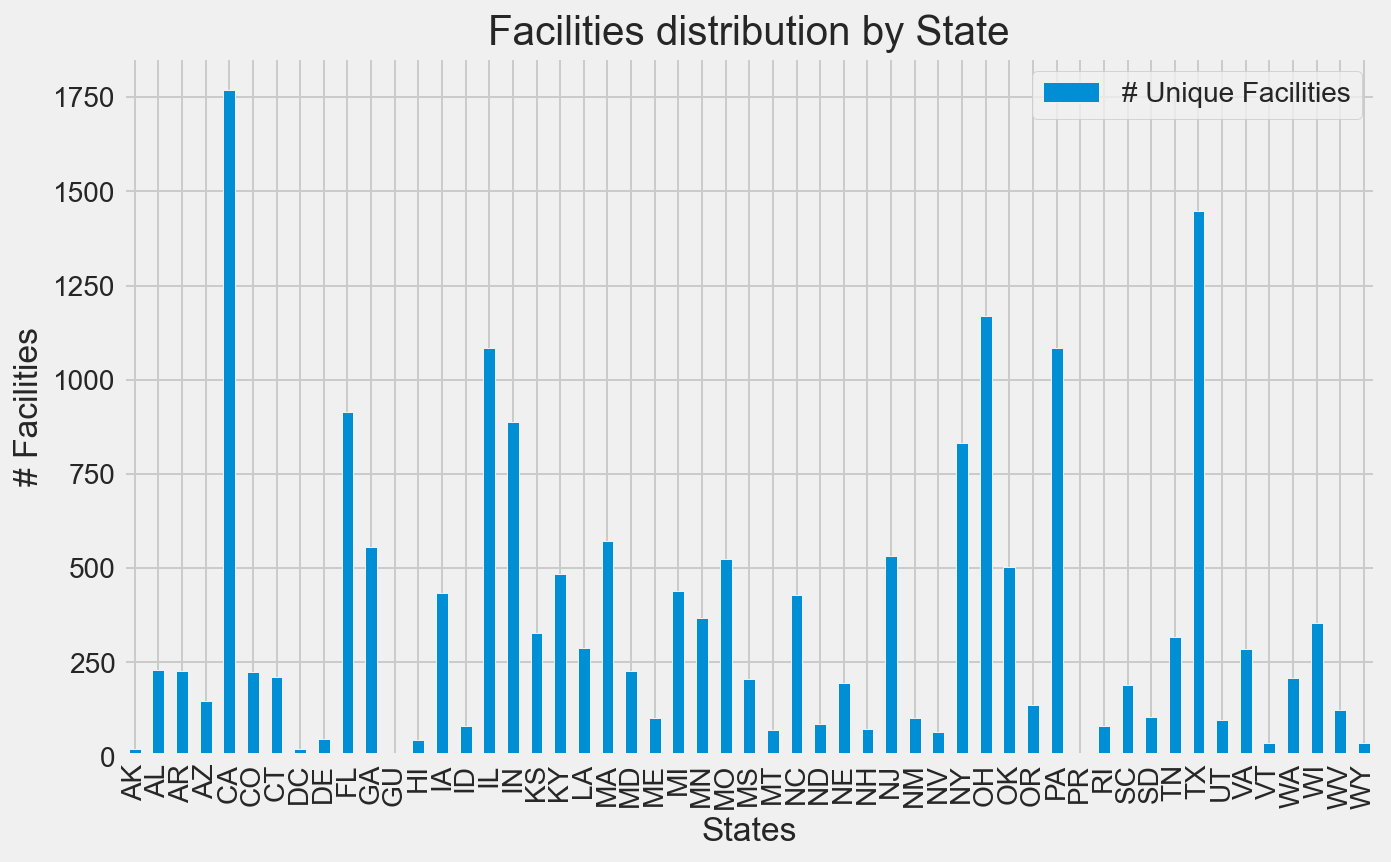

In [357]:
# Bar plots for Q1 - Facilities distribution by State
df_state = pd.DataFrame(list(q1_state['Unique Facilities']),columns = ['# Unique Facilities'], index = states_unique)
df_county = pd.DataFrame(list(q1_county['Unique Facilities']),columns = ['# Unique Facilities'], index = county_unique)

#Facilities distribution by State

plt.figure(figsize=(30,20))
plt.style.use('fivethirtyeight') 
df_state.plot(kind="bar")

plt.title("Facilities distribution by State")
plt.xlabel("States")
plt.ylabel("# Facilities")



In [ ]:
#Facilities distribution by Counties with # facilities > 80

df_county = df_county[df_county['# Unique Facilities']>80]

sns.set_style("dark")
df_county.plot(kind="barh")
plt.title("Facilities distribution [>80] by County")
plt.ylabel("County")
plt.xlabel("# Facilities")
#plt.xlim([0,8000])

In [466]:
# separating us states by region
states = pd.read_csv('states.csv')
states = states.rename(columns={'State Code':'Provider State'})
states_add = pd.DataFrame({'State':['Guam','Puerto Rico'],
                          'Provider State':['GU','PR'],
                          'Region':['West','South'],
                          'Division':['add','add']})

states = states.append(states_add)

data_s = data[['Provider State','Federal Provider Number']]

region = data_s.merge(states, on = 'Provider State', how='left')
region = region[['Federal Provider Number','Region']]
#region = region.nunique()
region = region.groupby(['Federal Provider Number']).agg({'Region':'first'})


q1_c = data.groupby(['County'], as_index=False).agg({'Federal Provider Number':'first'})
q1_c = q1_c.merge(region, on='Federal Provider Number', how='left')
q1_c = q1_c[['County', 'Region']]

data_q1 = q1_county.merge(q1_c, on='County',how='left')


#print(region.isnull().values.any()) rectified nan

print(region)
print(data_q1)
print(data_q1.isnull().values.any())

                        Region
Federal Provider Number       
45142                    South
45192                    South
45314                    South
55367                     West
55372                     West
...                        ...
676489                   South
676490                   South
676492                   South
686123                   South
686124                   South

[18993 rows x 1 columns]
         County  Unique Facilities     Region
0     Abbeville                  1      South
1        Acadia                  5      South
2      Accomack                  1      South
3           Ada                 16       West
4         Adair                  8    Midwest
...         ...                ...        ...
1701       York                 43  Northeast
1702      Young                  3      South
1703       Yuba                  1       West
1704       Yuma                  7       West
1705     Zapata                  1      South

[1706 rows x 3 col

In [396]:
# Checking for nan values in dataframe

print(states_add)

print(region.isnull().values.any())
test_nan = pd.DataFrame(list(region['Region'].isnull()), columns=['Region'])

#finding the nan value
print(test_nan[test_nan['Region']==True])
print(region.iloc[525837])

print(data_s[data_s['County']=='Ponce'])
print(len(states_unique))
print(states_unique)

print(states)
print(region)

         State Provider State Region Division
0         Guam             GU   West      add
1  Puerto Rico             PR  South      add
False
Empty DataFrame
Columns: [Region]
Index: []
County    Ponce
Region    South
Name: 525837, dtype: object
       Provider State County
525837             PR  Ponce
531183             PR  Ponce
531351             PR  Ponce
531545             PR  Ponce
531599             PR  Ponce
531909             PR  Ponce
532163             PR  Ponce
532375             PR  Ponce
532533             PR  Ponce
532892             PR  Ponce
533022             PR  Ponce
533026             PR  Ponce
533053             PR  Ponce
533519             PR  Ponce
533773             PR  Ponce
533924             PR  Ponce
534031             PR  Ponce
534145             PR  Ponce
534375             PR  Ponce
534480             PR  Ponce
534657             PR  Ponce
535276             PR  Ponce
535450             PR  Ponce
535795             PR  Ponce
535952             PR  Ponc

In [482]:
# Regions - South, West, Northeast, Midwest 

q1_south = data_q1[data_q1['Region']=='South']
q1_south = q1_south[['County','Unique Facilities']]

q1_west = data_q1[data_q1['Region']=='West']
q1_west = q1_west[['County','Unique Facilities']]

q1_northeast = data_q1[data_q1['Region']=='Northeast']
q1_northeast = q1_northeast[['County','Unique Facilities']]

q1_midwest = data_q1[data_q1['Region']=='Midwest']
q1_midwest = q1_midwest[['County','Unique Facilities']]


df_south = pd.DataFrame(list(q1_south['Unique Facilities']),columns=['# Unique Facilities'],index = list(q1_south['County']))
#df_south = df_south.dropna()
df_south = df_south[df_south['# Unique Facilities']>50]

df_west = pd.DataFrame(list(q1_west['Unique Facilities']),columns=['# Unique Facilities'],index = list(q1_west['County']))
#df_south = df_south.dropna()
#df_west = df_west .dropna()
df_west = df_west[df_west['# Unique Facilities']> 20]

df_northeast = pd.DataFrame(list(q1_northeast['Unique Facilities']),columns=['# Unique Facilities'],index = list(q1_northeast['County']))
#df_south = df_south.dropna()
#df_northeast = df_northeast.dropna()
df_northeast = df_northeast[df_northeast['# Unique Facilities']>20]

df_midwest = pd.DataFrame(list(q1_midwest['Unique Facilities']),columns=['# Unique Facilities'],index = list(q1_midwest['County']))
#df_south = df_south.dropna()
#df_midwest = df_midwest.dropna()
df_midwest = df_midwest[df_midwest['# Unique Facilities']>20]

print(len(q1_west['Unique Facilities']))
print(df_west)

257
                # Unique Facilities
Adams                            57
Alameda                         101
Arapahoe                         21
Bernalillo                       30
Contra Costa                     41
Denver                           22
Douglas                          60
Fresno                           49
Honolulu                         27
Kern                             26
King                             52
Kings                            65
Lake                            132
Los Angeles                     552
Maricopa                         82
Multnomah                        34
Oneida                           30
Pima                             25
Riverside                        83
Sacramento                       58
Salt Lake                        33
San Bernardino                   82
San Diego                       121
San Francisco                    27
San Joaquin                      36
Santa Barbara                    22
Santa Clara             

Text(0.5, 0, '# Facilities')

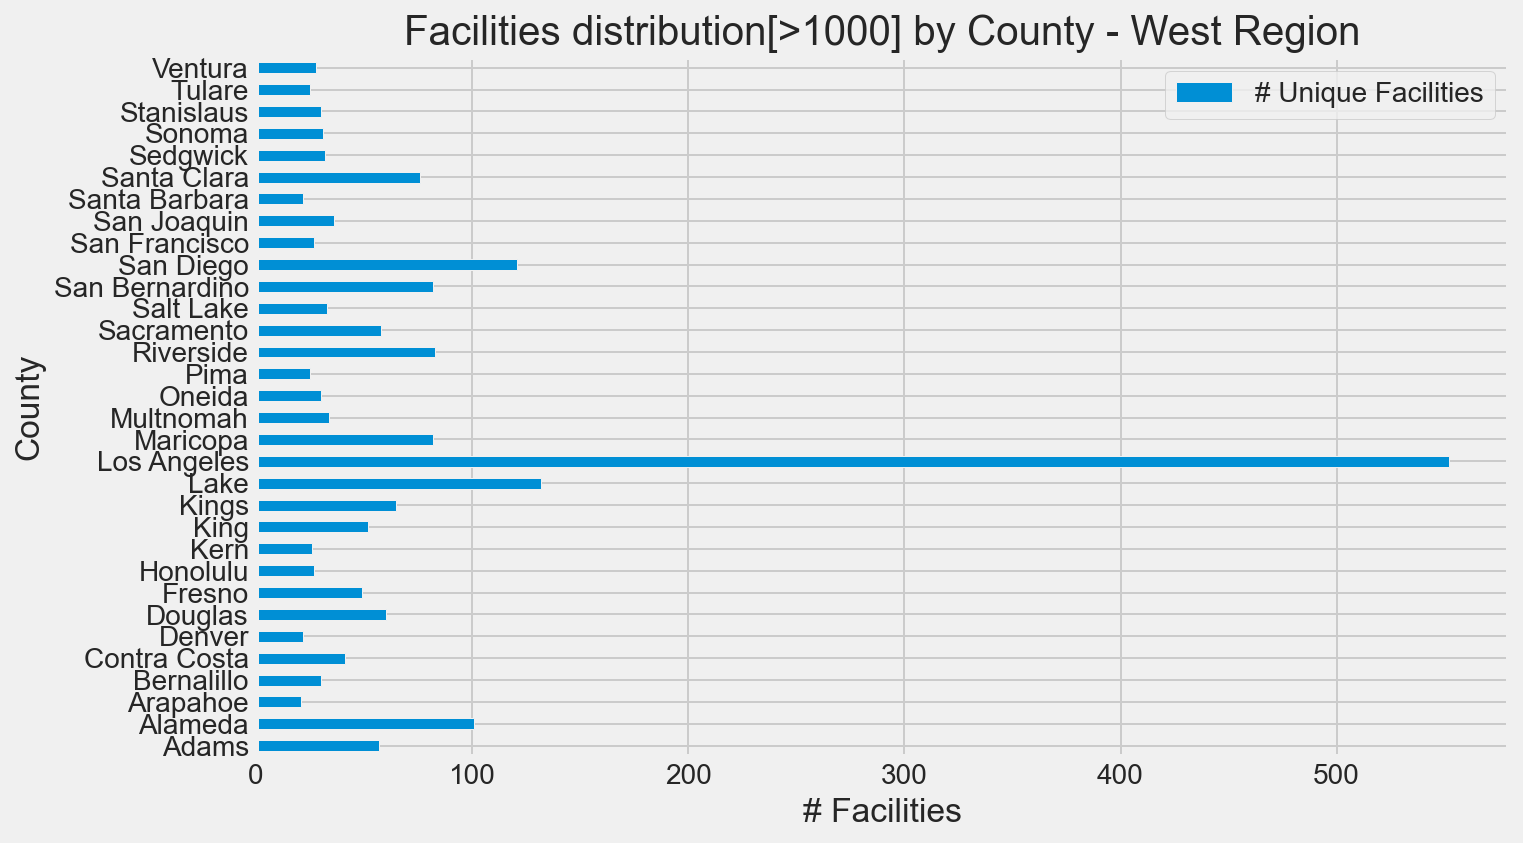

In [476]:
# West Region 

plt.style.use('fivethirtyeight') 
df_west.plot(kind="barh")
plt.title("Facilities distribution[>20] by County - West Region")
plt.ylabel("County")
plt.xlabel("# Facilities")
#plt.xlim([0,6000])

Text(0.5, 0, '# Facilities')

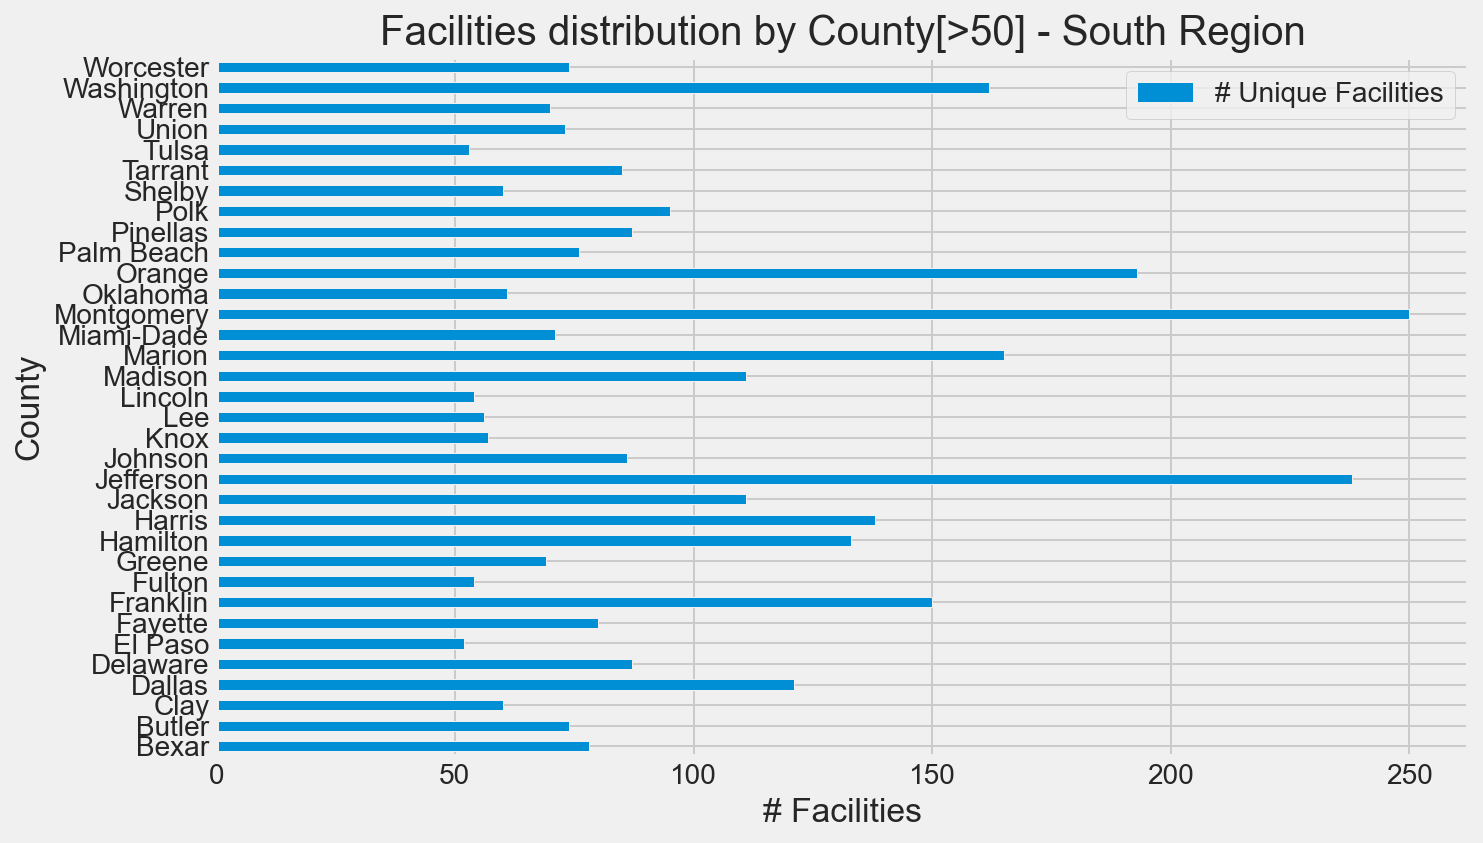

In [478]:
# South Region 

plt.style.use('fivethirtyeight') 
df_south.plot(kind="barh")
plt.title("Facilities distribution by County[>50] - South Region")
plt.ylabel("County")
plt.xlabel("# Facilities")
#plt.xlim([0,5000])

Text(0.5, 0, '# Facilities')

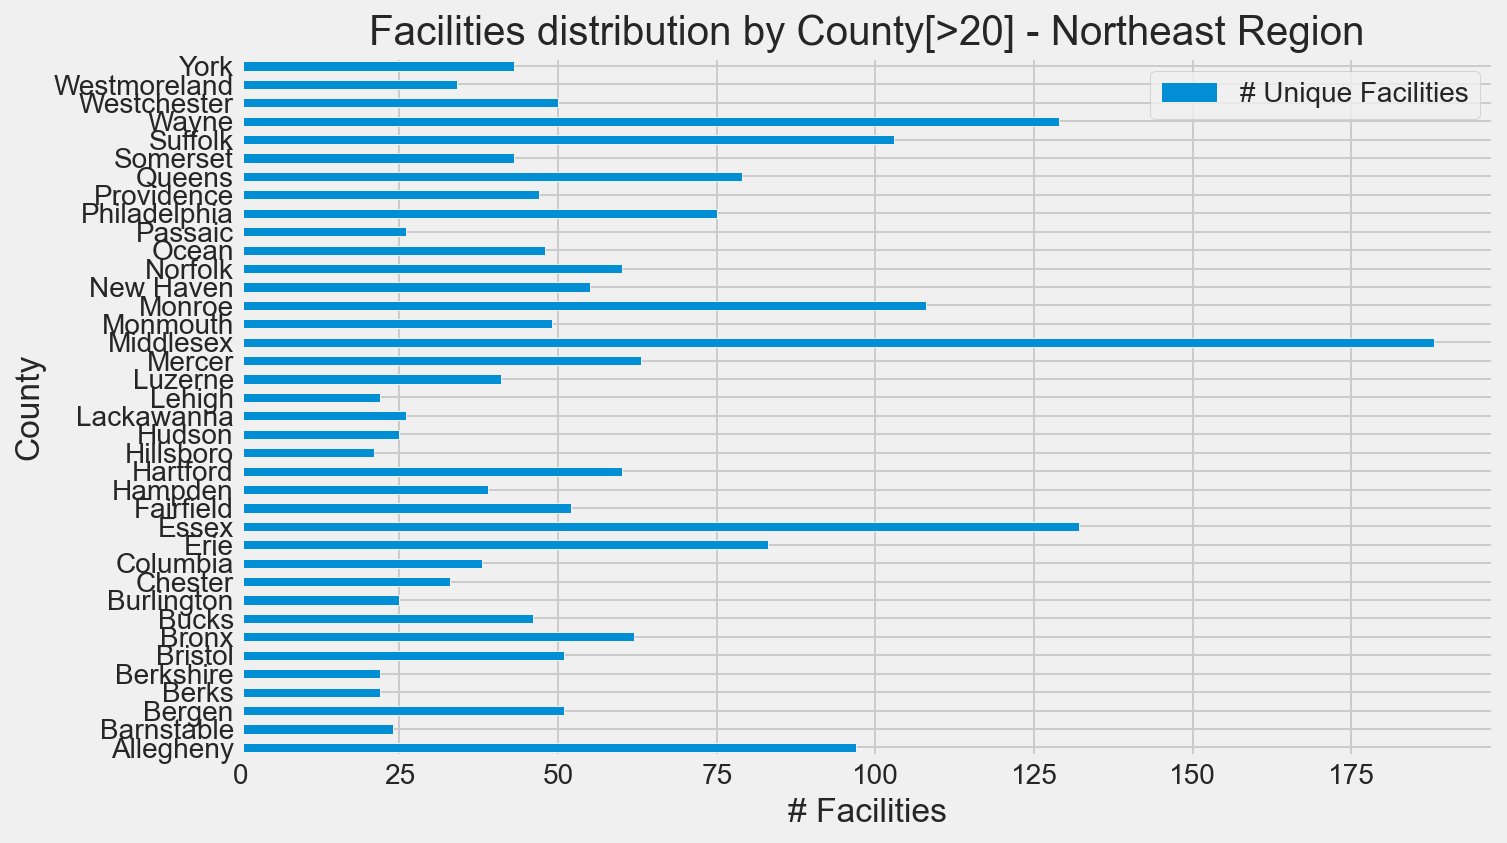

In [481]:
# Northeast Region 

plt.style.use('fivethirtyeight') 
df_northeast.plot(kind="barh")
plt.title("Facilities distribution by County[>20] - Northeast Region")
plt.ylabel("County")
plt.xlabel("# Facilities")
#plt.xlim([0,6000])

Text(0.5, 0, '# Facilities')

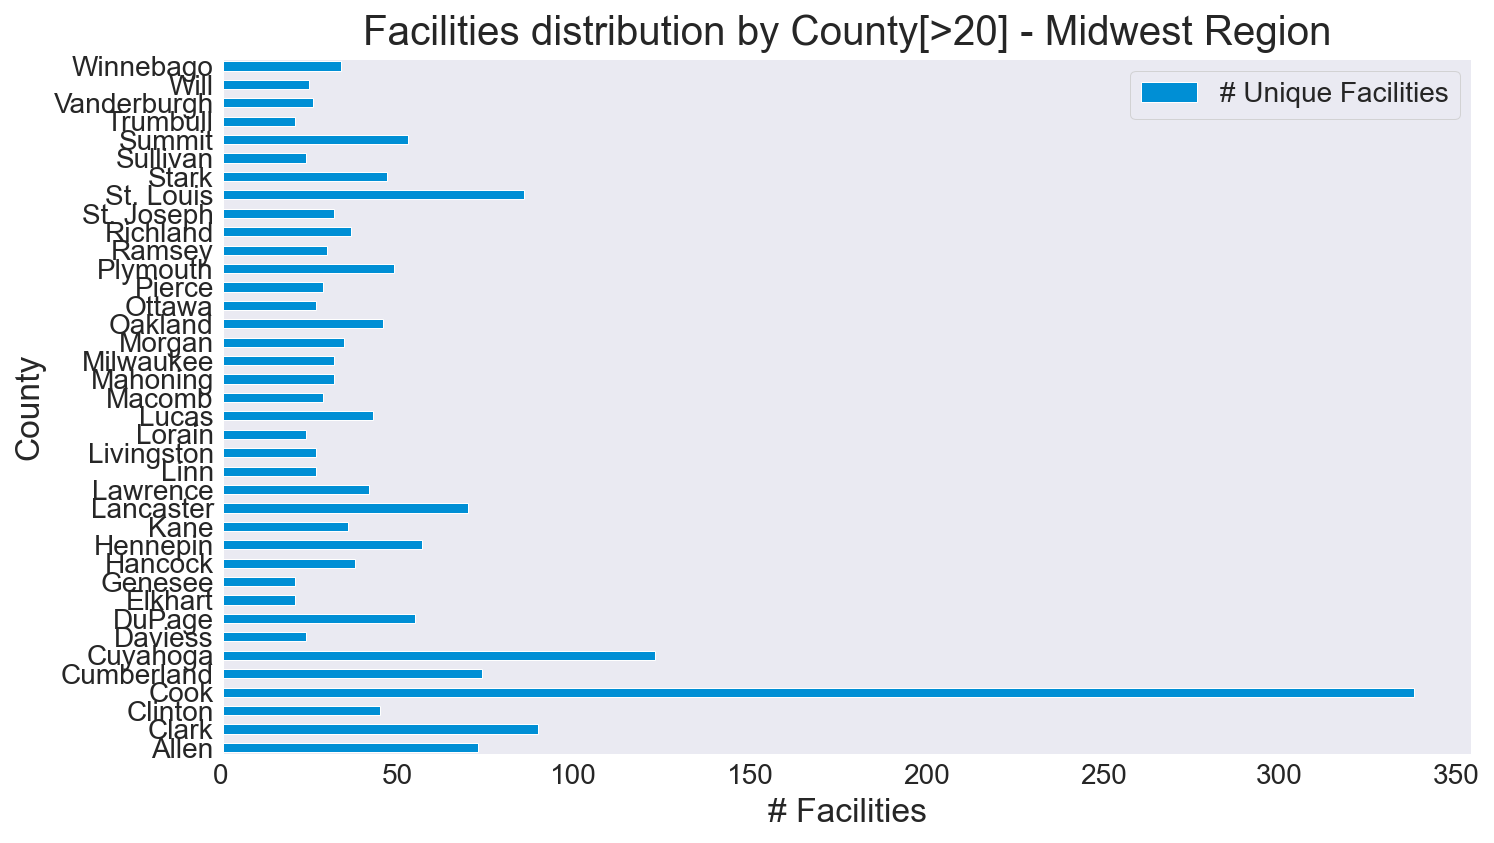

In [483]:
# Midwest Region 

sns.set_style("dark")
df_midwest.plot(kind="barh")
plt.title("Facilities distribution by County[>20] - Midwest Region")
plt.ylabel("County")
plt.xlabel("# Facilities")
#plt.xlim([0,6500])

In [484]:
'''
2. Conduct a facility and county level analysis on shortage of aides, clinical staff,
nursing staff and other staff (define the following metric for this analysis:
number of weeks the shortage was experienced). Visualize how this metric
changes by facility and county. Show the top 10 facilities that face the
aforementioned shortages. In addition show visualizations to compare the
differences between aides, clinical staff, nursing staff and other staff shortages
at a national level.
'''

'\n2. Conduct a facility and county level analysis on shortage of aides, clinical staff,\nnursing staff and other staff (define the following metric for this analysis:\nnumber of weeks the shortage was experienced). Visualize how this metric\nchanges by facility and county. Show the top 10 facilities that face the\naforementioned shortages. In addition show visualizations to compare the\ndifferences between aides, clinical staff, nursing staff and other staff shortages\nat a national level.\n'

In [491]:
# preparing data for q2

'''
data = pd.read_csv('COVID-19_Nursing_Home_Dataset.csv')
'''

q2 = data

print(q2[['Shortage of Nursing Staff','Shortage of Clinical Staff','Shortage of Aides','Shortage of Other Staff']])

q2_1 = q2.replace({'Shortage of Nursing Staff': {'N': 0, 'Y': 1}, 
                   'Shortage of Clinical Staff': {'N': 0, 'Y': 1},
                   'Shortage of Aides': {'N': 0, 'Y': 1},
                   'Shortage of Other Staff': {'N': 0, 'Y': 1}})

print(q2_1[['Shortage of Nursing Staff','Shortage of Clinical Staff','Shortage of Aides','Shortage of Other Staff']])




       Shortage of Nursing Staff Shortage of Clinical Staff Shortage of Aides  \
0                              N                          N                 N   
1                              N                          N                 N   
2                              N                          N                 Y   
3                              N                          N                 N   
4                              N                          N                 N   
...                          ...                        ...               ...   
659991                         N                          N                 N   
659992                         N                          N                 N   
659993                         N                          N                 N   
659994                         N                          N                 N   
659995                         N                          N                 N   

       Shortage of Other St

In [506]:
# number of weeks the shortage was experienced - by County (top 10)

q2c_ns = q2_1.groupby(['County'], as_index=False)['Shortage of Nursing Staff'].sum()
q2c_ns = q2c_ns.sort_values(by=['Shortage of Nursing Staff'], ascending=False)
q2c_ns = q2c_ns.head(10)

q2c_cs = q2_1.groupby(['County'], as_index=False)['Shortage of Clinical Staff'].sum()
q2c_cs = q2c_cs.sort_values(by=['Shortage of Clinical Staff'], ascending = False)
q2c_cs = q2c_cs.head(10)

q2c_a = q2_1.groupby(['County'], as_index=False)['Shortage of Aides'].sum()
q2c_a = q2c_a.sort_values(by=['Shortage of Aides'], ascending= False)
q2c_a = q2c_a.head(10)

q2c_os = q2_1.groupby(['County'], as_index=False)['Shortage of Other Staff'].sum()
q2c_os = q2c_os.sort_values(by=['Shortage of Other Staff'],ascending=False)
q2c_os = q2c_os.head(10)

print(q2c_ns)
print(q2c_cs)
print(q2c_a)
print(q2c_os)



          County  Shortage of Nursing Staff
769    Jefferson                     1554.0
651     Hamilton                     1384.0
1622       Wayne                     1257.0
406     Cuyahoga                     1159.0
1035  Montgomery                     1144.0
1614  Washington                     1109.0
551     Franklin                     1071.0
946       Marion                     1014.0
368         Cook                     1002.0
1438   St. Louis                      981.0
          County  Shortage of Clinical Staff
406     Cuyahoga                       343.0
1035  Montgomery                       293.0
769    Jefferson                       251.0
1614  Washington                       212.0
848         Lake                       194.0
1622       Wayne                       184.0
651     Hamilton                       179.0
929      Madison                       172.0
368         Cook                       170.0
779      Johnson                       154.0
          County  Sho

In [509]:
# number of weeks the shortage was experienced - by Facility (top 10)

q2f_ns = q2_1.groupby(['Provider Name'], as_index=False)['Shortage of Nursing Staff'].sum()
q2f_ns = q2f_ns.sort_values(by=['Shortage of Nursing Staff'], ascending=False)
q2f_ns = q2f_ns.head(10)

q2f_cs = q2_1.groupby(['Provider Name'], as_index=False)['Shortage of Clinical Staff'].sum()
q2f_cs = q2f_cs.sort_values(by=['Shortage of Clinical Staff'], ascending = False)
q2f_cs = q2f_cs.head(10)

q2f_a = q2_1.groupby(['Provider Name'], as_index=False)['Shortage of Aides'].sum()
q2f_a = q2f_a.sort_values(by=['Shortage of Aides'], ascending= False)
q2f_a = q2f_a.head(10)

q2f_os = q2_1.groupby(['Provider Name'], as_index=False)['Shortage of Other Staff'].sum()
q2f_os = q2f_os.sort_values(by=['Shortage of Other Staff'],ascending=False)
q2f_os = q2f_os.head(10)

print(q2f_ns)
print(q2f_cs)
print(q2f_a)
print(q2f_os)

                                 Provider Name  Shortage of Nursing Staff
8543                      MILLER'S MERRY MANOR                      203.0
4231                            FAIRVIEW MANOR                       79.0
14361              WEDGEWOOD HEALTHCARE CENTER                       78.0
12834                              SUNSET HOME                       78.0
11752                   SHADY REST CARE CENTER                       74.0
1427                              BETHANY HOME                       71.0
5832               HERITAGE HEALTH CARE CENTER                       68.0
14262                   WASHINGTON CARE CENTER                       61.0
11802  SHELBY HEALTH AND REHABILITATION CENTER                       60.0
9841                      PARKVIEW CARE CENTER                       60.0
                                         Provider Name  \
12385                             ST ANTHONY PARK HOME   
2859   COLONIAL PARK REHABILITATION AND NURSING CENTER   
1805        

AttributeError: 'AxesSubplot' object has no attribute 'q2_plotf_ns'

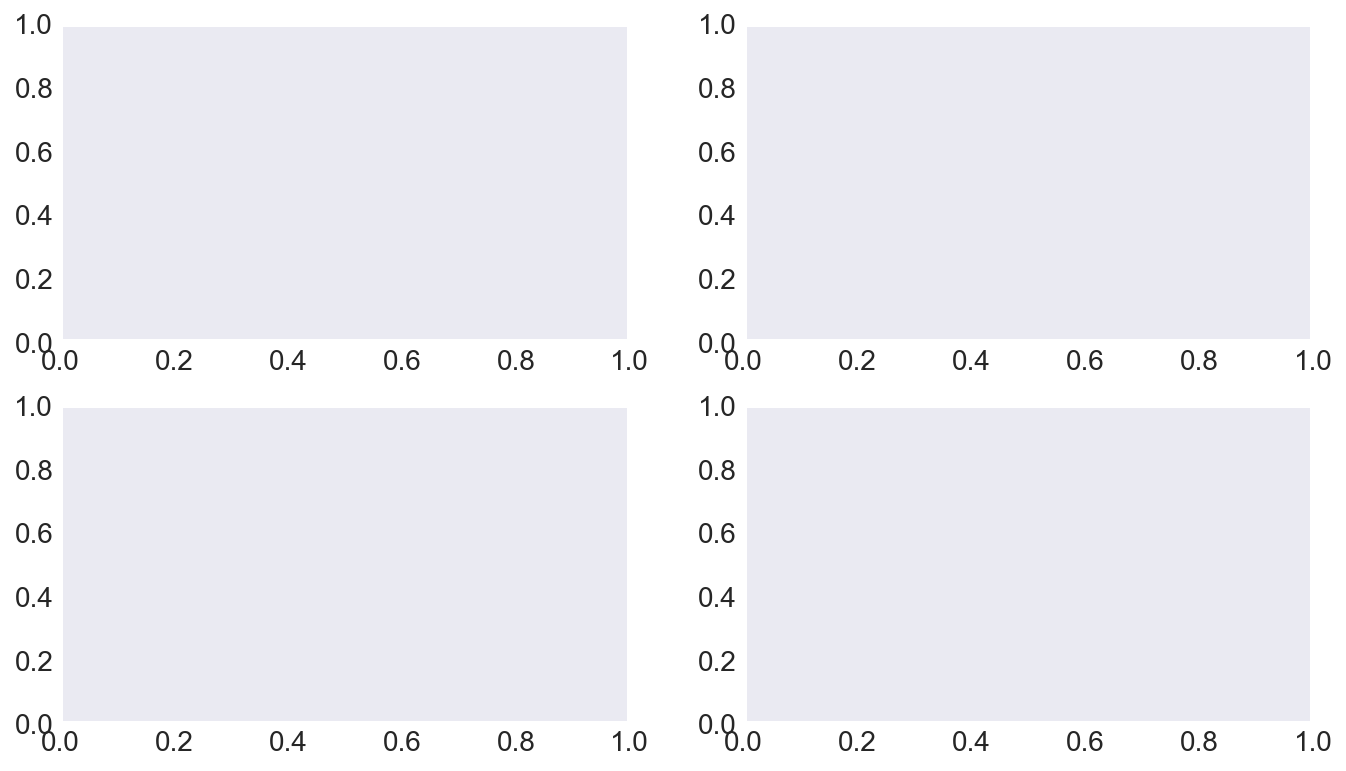

In [514]:
# Bar plot showing top 10 facilities with shortages

q2_plotf_ns = pd.DataFrame(list(q2f_ns['Shortage of Nursing Staff']), columns = ['Shortage of Nursing Staff'],
                          index=list(q2f_ns['Provider Name']))  

q2_plotf_cs = pd.DataFrame(list(q2f_cs['Shortage of Clinical Staff']), columns = ['Shortage of Clinical Staff'],
                          index=list(q2f_cs['Provider Name']))  

q2_plotf_a = pd.DataFrame(list(q2f_a['Shortage of Aides']), columns = ['Shortage of Aides'],
                          index=list(q2f_a['Provider Name']))  

q2_plotf_os = pd.DataFrame(list(q2f_os['Shortage of Other Staff']), columns = ['Shortage of Other Staff'],
                          index=list(q2f_os['Provider Name']))  


#creating bar plots 2x2

fig, axs = plt.subplots(2,2)

axs[0, 0].q2_plotf_ns.plot(kind='bar', ax=axs)
axs[0, 0].set_title('Shortage of Nursing Staff - top 10 facilities')

axs[0, 1].q2_plotf_cs.plot(kind='bar',ax=axs)
axs[0, 1].set_title('Shortage of Clinical Staff - top 10 facilities')

axs[1, 0].q2_plotf_a.plot(kind='bar',ax=axs)
axs[1, 0].set_title('Shortage of Aides - top 10 facilities')

axs[1, 1].q2_plotf_os.plot(kind='bar',ax=axs)
axs[1, 1].set_title('Shortage of Other Staff - top 10 facilities')

for ax in axs.flat:
    ax.set(xlabel='Facilities', ylabel='# of Weeks shortage')

